In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
!cp drive/MyDrive/data.zip .
!unzip -q data.zip
!rm data.zip

!cp drive/MyDrive/test.zip .
!unzip -q test.zip
!rm test.zip

In [4]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential, load_model
from keras.layers import Dense, Input, Flatten, Dropout, Reshape, GaussianNoise, Layer, Lambda, Conv2D, MaxPool2D, UpSampling2D
from keras import Model
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from IPython.display import clear_output
from keras import backend as K
from keras.losses import binary_crossentropy, mse

warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,10)

**Згенерувати точки у тривимiрному просторi. Розбити їх на навчальний i тестовий набори.**

In [ ]:
data = np.zeros(shape=(1000, 3))
data[:, 2] = np.random.random(1000) * 15
data[:, 0] = np.sin(data[:, 2]) + 0.1 * np.random.random(1000)
data[:, 1] = np.cos(data[:, 2]) + 0.1 * np.random.random(1000)

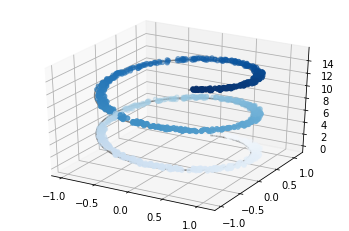

In [ ]:
ax = plt.axes(projection ='3d')
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
ax.scatter3D(data[: ,0], data[: ,1], data[: ,2], c= data [: ,2], cmap ='Blues');

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(data[:800])
X_test = scaler.transform(data[800:])

**Побудувати двi моделi лiнiйного автокодувальника: одну - для двовимiрного, iншу - для одновимiрного представлення.**

2d

In [ ]:
opt = Adam()

model = Sequential(name = 'model1')
model.add(Dense(2, input_shape=(3,), name = 'coder'))
model.add(Dense(3, name = 'decoder'))

mse = MeanSquaredError()

model.compile(optimizer=opt, loss = mse)
model.summary()

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
coder (Dense)                (None, 2)                 8         
_________________________________________________________________
decoder (Dense)              (None, 3)                 9         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback = EarlyStopping(
    monitor="loss",
    mode="auto",
    patience=3
)

In [ ]:
with tf.device('/device:GPU:0'):
  history = model.fit(x=X_train, y=X_train, epochs=500, verbose=1, callbacks=callback)

Epoch 1/500
25/25 [==============================] - 3s 1ms/step - loss: 2.8788
Epoch 2/500
25/25 [==============================] - 0s 1ms/step - loss: 2.6927
Epoch 3/500
25/25 [==============================] - 0s 1ms/step - loss: 2.4832
Epoch 4/500
25/25 [==============================] - 0s 1ms/step - loss: 2.2570
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 2.0478
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 1.9136
Epoch 7/500
25/25 [==============================] - 0s 1ms/step - loss: 1.8307
Epoch 8/500
25/25 [==============================] - 0s 1ms/step - loss: 1.7383
Epoch 9/500
25/25 [==============================] - 0s 1ms/step - loss: 1.5628
Epoch 10/500
25/25 [==============================] - 0s 1ms/step - loss: 1.5187
Epoch 11/500
25/25 [==============================] - 0s 1ms/step - loss: 1.4103
Epoch 12/500
25/25 [==============================] - 0s 1ms/step - loss: 1.3357
Epoch 13/500
25/25 [=================

In [ ]:
predict = model.predict(X_test)

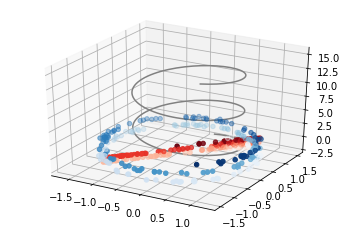

In [ ]:
ax = plt.axes(projection ='3d')
zline = np.linspace(0, 15,200)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
ax.scatter3D(X_test[: ,0], X_test[: ,1], X_test[: ,2], c= X_test[: ,2], cmap ='Blues');
ax.scatter3D(predict[: ,0], predict[: ,1], predict[: ,2], c= predict[: ,2], cmap ='Reds');

In [ ]:
encoded = model.layers[0].output
encoder = Model(inputs= model.inputs, outputs=encoded)
x_train_2d = encoder.predict(X_train)

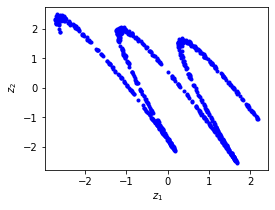

In [ ]:
fig = plt.figure(figsize=(4,3))
plt.plot(x_train_2d[: ,0] , x_train_2d[: ,1] , "b.")
plt.xlabel(" $z_1$ ")
plt.ylabel(" $z_2$ ")
plt.show();

1d

In [ ]:
opt = Adam()

model2 = Sequential(name = 'model2')
model2.add(Dense(1, input_shape=(3,), name = 'coder'))
model2.add(Dense(3, name = 'decoder'))

mse = MeanSquaredError()

model2.compile(optimizer=opt, loss = mse)
model2.summary()

Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
coder (Dense)                (None, 1)                 4         
_________________________________________________________________
decoder (Dense)              (None, 3)                 6         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
with tf.device('/device:GPU:0'):
  history2 = model2.fit(x=X_train, y=X_train, epochs=500, verbose=1, callbacks=callback)

Epoch 1/500
25/25 [==============================] - 0s 1ms/step - loss: 2.0283
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 1.8930
Epoch 3/500
25/25 [==============================] - 0s 1ms/step - loss: 1.7688
Epoch 4/500
25/25 [==============================] - 0s 1ms/step - loss: 1.7128
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 1.5933
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 1.4863
Epoch 7/500
25/25 [==============================] - 0s 1ms/step - loss: 1.4637
Epoch 8/500
25/25 [==============================] - 0s 1ms/step - loss: 1.3906
Epoch 9/500
25/25 [==============================] - 0s 2ms/step - loss: 1.3564
Epoch 10/500
25/25 [==============================] - 0s 1ms/step - loss: 1.2956
Epoch 11/500
25/25 [==============================] - 0s 1ms/step - loss: 1.2873
Epoch 12/500
25/25 [==============================] - 0s 1ms/step - loss: 1.2402
Epoch 13/500
25/25 [=================

In [ ]:
predict = model2.predict(X_test)

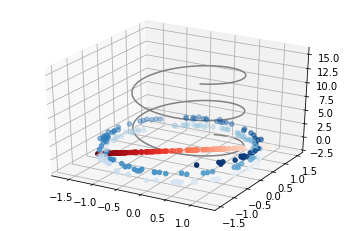

In [ ]:
ax = plt.axes(projection ='3d')
zline = np.linspace(0, 15,200)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
ax.scatter3D(X_test[: ,0], X_test[: ,1], X_test[: ,2], c= X_test[: ,2], cmap ='Blues');
ax.scatter3D(predict[: ,0], predict[: ,1], predict[: ,2], c= predict[: ,2], cmap ='Reds');

In [ ]:
encoded = model2.layers[0].output
encoder = Model(inputs= model2.inputs, outputs=encoded)
x_train_1d = encoder.predict(X_train)

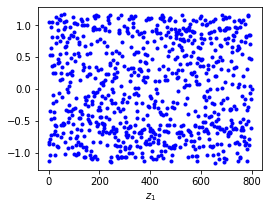

In [ ]:
fig = plt.figure(figsize=(4,3))
plt.plot(x_train_1d , "b.")
plt.xlabel(" $z_1$ ")
plt.show();

**Аналогiчно побудувати i навчити двi моделi нелiнiйного автокодувальника.**

2d

In [ ]:
opt = Adam()

model3 = Sequential(name = 'model3')
model3.add(Dense(2, input_shape=(3,), name = 'coder', activation="tanh"))
model3.add(Dense(3, name = 'decoder'))

mse = MeanSquaredError()

model3.compile(optimizer=opt, loss = mse)
model3.summary()

Model: "model3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
coder (Dense)                (None, 2)                 8         
_________________________________________________________________
decoder (Dense)              (None, 3)                 9         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [ ]:
with tf.device('/device:GPU:0'):
  history3 = model3.fit(x=X_train, y=X_train, epochs=500, verbose=1, callbacks=callback)

Epoch 1/500
25/25 [==============================] - 0s 1ms/step - loss: 1.6445
Epoch 2/500
25/25 [==============================] - 0s 1ms/step - loss: 1.5420
Epoch 3/500
25/25 [==============================] - 0s 1ms/step - loss: 1.4455
Epoch 4/500
25/25 [==============================] - 0s 1ms/step - loss: 1.3436
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 1.2857
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 1.1895
Epoch 7/500
25/25 [==============================] - 0s 1ms/step - loss: 1.1555
Epoch 8/500
25/25 [==============================] - 0s 1ms/step - loss: 1.0982
Epoch 9/500
25/25 [==============================] - 0s 1ms/step - loss: 1.0351
Epoch 10/500
25/25 [==============================] - 0s 1ms/step - loss: 0.9618
Epoch 11/500
25/25 [==============================] - 0s 1ms/step - loss: 0.9197
Epoch 12/500
25/25 [==============================] - 0s 1ms/step - loss: 0.8481
Epoch 13/500
25/25 [=================

In [ ]:
predict = model3.predict(X_test)

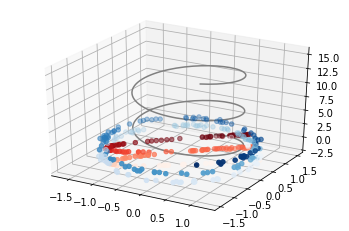

In [ ]:
ax = plt.axes(projection ='3d')
zline = np.linspace(0, 15,200)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
ax.scatter3D(X_test[: ,0], X_test[: ,1], X_test[: ,2], c= X_test[: ,2], cmap ='Blues');
ax.scatter3D(predict[: ,0], predict[: ,1], predict[: ,2], c= predict[: ,2], cmap ='Reds');

In [ ]:
encoded = model3.layers[0].output
encoder = Model(inputs= model3.inputs, outputs=encoded)
x_train_2d = encoder.predict(X_train)

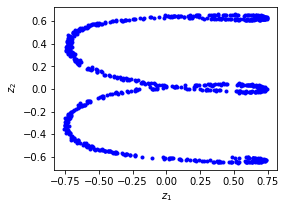

In [ ]:
fig = plt.figure(figsize=(4,3))
plt.plot(x_train_2d[: ,0] , x_train_2d[: ,1] , "b.")
plt.xlabel(" $z_1$ ")
plt.ylabel(" $z_2$ ")
plt.show();

1d

In [ ]:
opt = Adam()

model4 = Sequential(name = 'model4')
model4.add(Dense(1, input_shape=(3,), name = 'coder', activation="tanh"))
model4.add(Dense(3, name = 'decoder'))

mse = MeanSquaredError()

model4.compile(optimizer=opt, loss = mse)
model4.summary()

Model: "model4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
coder (Dense)                (None, 1)                 4         
_________________________________________________________________
decoder (Dense)              (None, 3)                 6         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
with tf.device('/device:GPU:0'):
  history4 = model4.fit(x=X_train, y=X_train, epochs=500, verbose=1, callbacks=callback)

Epoch 1/500
25/25 [==============================] - 0s 1ms/step - loss: 1.2672
Epoch 2/500
25/25 [==============================] - 0s 1ms/step - loss: 1.2163
Epoch 3/500
25/25 [==============================] - 0s 1ms/step - loss: 1.1782
Epoch 4/500
25/25 [==============================] - 0s 1ms/step - loss: 1.0989
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 1.0673
Epoch 6/500
25/25 [==============================] - 0s 1ms/step - loss: 0.9927
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 0.9606
Epoch 8/500
25/25 [==============================] - 0s 1ms/step - loss: 0.9175
Epoch 9/500
25/25 [==============================] - 0s 1ms/step - loss: 0.8974
Epoch 10/500
25/25 [==============================] - 0s 1ms/step - loss: 0.8456
Epoch 11/500
25/25 [==============================] - 0s 1ms/step - loss: 0.8171
Epoch 12/500
25/25 [==============================] - 0s 1ms/step - loss: 0.8039
Epoch 13/500
25/25 [=================

In [ ]:
predict = model4.predict(X_test)

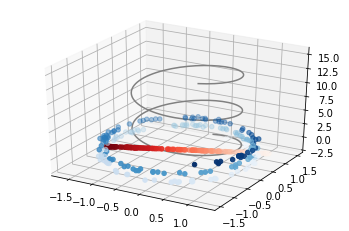

In [ ]:
ax = plt.axes(projection ='3d')
zline = np.linspace(0, 15,200)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
ax.scatter3D(X_test[: ,0], X_test[: ,1], X_test[: ,2], c= X_test[: ,2], cmap ='Blues');
ax.scatter3D(predict[: ,0], predict[: ,1], predict[: ,2], c= predict[: ,2], cmap ='Reds');

In [ ]:
encoded = model4.layers[0].output
encoder = Model(inputs= model4.inputs, outputs=encoded)
x_train_1d = encoder.predict(X_train)

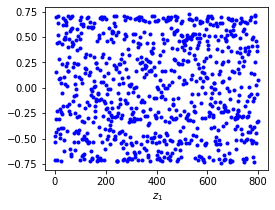

In [ ]:
fig = plt.figure(figsize=(4,3))
plt.plot(x_train_1d , "b.")
plt.xlabel(" $z_1$ ")
plt.show();

# Виконати попереднє навчання класифiкатора зображень, використовуючи шумопригнiчуючий автокодувальник

**Завантажити набiр даних iз зображеннями згiдно з варiантом роботи No.3**

**Розбити данi на три пiдмножини: навчальну; валiдацiйну - для налаштування значень гiперпараметрiв; тестову - для остаточної оцiнки якостi.**

In [5]:
datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train = datagen.flow_from_directory('data/train/', color_mode="rgb",
                                       class_mode='binary', batch_size=32, target_size=(64, 64))
test = datagen.flow_from_directory('data/test/', color_mode="rgb",
                                      class_mode='binary', batch_size=32, target_size=(64, 64))
valid = datagen.flow_from_directory('data/valid/', color_mode="rgb",
                                      class_mode='binary', batch_size=32, target_size=(64, 64))

Found 19899 images belonging to 2 classes.
Found 2539 images belonging to 2 classes.
Found 2545 images belonging to 2 classes.


**Побудувати глибоку модель шумопригнiчуючого автокодувальника. Навчити її на навчальному наборi.**

In [ ]:
def create_autoencoder(units, noise_type, noise_param, activation):
    orig_dim=(64, 64, 3)
    orig_flat_dim = np.prod(orig_dim)
    encoded_dim = (units[-1],)

    input_enc = Input(orig_dim)
    x = Flatten()(input_enc)

    if noise_type == 'dropout':
        x = Dropout(noise_param)(x)
    elif noise_type == 'gaussian':
        x = GaussianNoise(noise_param)(x)

    for u in units:
        x = Dense(u, activation=activation)(x)
    encoded = x

    input_dec = Input(encoded_dim)
    x = input_dec

    for u in reversed(units[:-1]):
        x = Dense(u, activation=activation)(x)

    x = Dense(orig_flat_dim, activation='sigmoid')(x)
    decoded = Reshape(orig_dim)(x)

    encoder = Model(input_enc, encoded, name="encoder")
    decoder = Model(input_dec, decoded, name="decoder")
    autoencoder = Model(input_enc, decoder(encoder(input_enc)), name="autoencoder")
    return encoder, decoder, autoencoder

In [ ]:
encoder, decoder, autoencoder = create_autoencoder([1024, 256, 64], 'dropout', 0.3, 'relu')

encoder.summary()
decoder.summary()
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12288)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12288)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              12583936  
_________________________________________________________________
dense_7 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
Total params: 12,862,784
Trainable params: 12,862,784
Non-trainable params: 0
_______________________________________________

In [ ]:
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)


In [7]:
X, Y = zip(*(train[i] for i in range(len(train)-1)))
X, Y = np.vstack(X), np.vstack(Y).reshape(-1, 1)

In [8]:
X_v, Y_v = zip(*(valid[i] for i in range(len(valid)-1)))
X_v, Y_v = np.vstack(X_v), np.vstack(Y_v).reshape(-1, 1)

In [10]:
X_t, Y_t = zip(*(test[i] for i in range(len(test)-1)))
X_t, Y_t = np.vstack(X_t), np.vstack(Y_t).reshape(-1, 1)

In [ ]:
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0510 - val_loss: 0.0333
Epoch 2/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0317 - val_loss: 0.0304
Epoch 3/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0294 - val_loss: 0.0286
Epoch 4/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0280 - val_loss: 0.0282
Epoch 5/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0274 - val_loss: 0.0273
Epoch 6/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0267 - val_loss: 0.0273
Epoch 7/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0266 - val_loss: 0.0272
Epoch 8/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0264 - val_loss: 0.0271
Epoch 9/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0263 - val_loss: 0.0272
Epoch 10/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0263 - val_l

In [9]:
test2 = []
for i in range(1,22):
    test2.append(img_to_array(load_img(f'test/{i}.jpg', target_size=(64, 64)))/255)

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)

1/1 [==============================] - 0s 21ms/step


dropout 0.3, [1024, 256, 64], relu, 50epoch


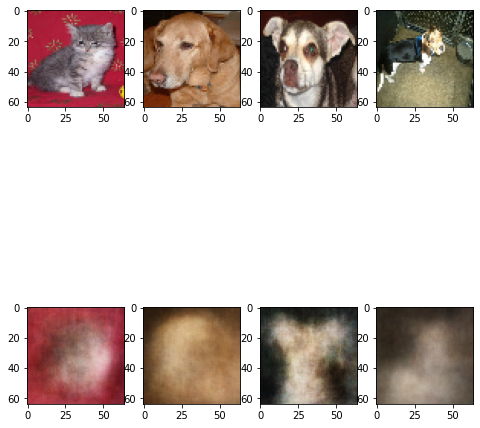

In [ ]:
print("dropout 0.3, [1024, 256, 64], relu, 50epoch")
for i in range(4):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

 **Спробувати пiдiбрати гiперпараметри моделi, використовуючи перехресну
перевiрку, так щоб модель гарно виконувала реконструкцiю зображень.**

спробуємо збільшити/зменшиит кількість нейронів у скритих шарах

In [ ]:
encoder, decoder, autoencoder = create_autoencoder([1024, 256, 128], 'dropout', 0.3, 'relu')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
encoder (Functional)         (None, 128)               12879232  
_________________________________________________________________
decoder (Functional)         (None, 64, 64, 3)         12891392  
Total params: 25,770,624
Trainable params: 25,770,624
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
621/621 [==============================] - 13s 16ms/step - loss: 0.0518 - val_loss: 0.0331
Epoch 2/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0314 - val_loss: 0.0298
Epoch 3/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0288 - val_loss: 0.0284
Epoch 4/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0275 - val_loss: 0.0274
Epoch 5/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0269 - val_loss: 0.0264
Epoch 6/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0260 - val_loss: 0.0262
Epoch 7/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0257 - val_loss: 0.0262
Epoch 8/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0256 - val_loss: 0.0264
Epoch 9/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0255 - val_loss: 0.0262
Epoch 10/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0251 - val_

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)

1/1 [==============================] - 0s 119ms/step


dropout 0.3, [2048, 256, 64], relu, 43epoch


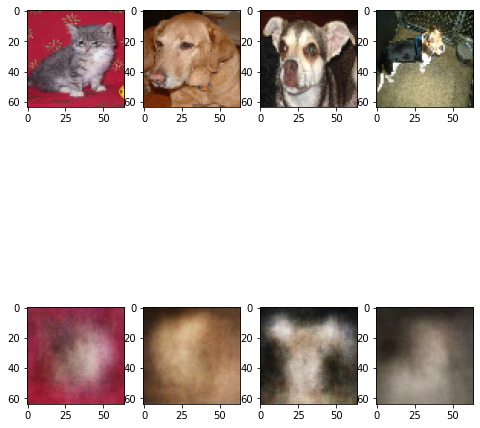

In [ ]:
print("dropout 0.3, [1024, 256, 128], relu, 50poch")
for i in range(4):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

In [ ]:
clear_output()

In [ ]:
encoder, decoder, autoencoder = create_autoencoder([1024, 256, 32], 'dropout', 0.3, 'relu')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
encoder (Functional)         (None, 32)                12854560  
_________________________________________________________________
decoder (Functional)         (None, 64, 64, 3)         12866816  
Total params: 25,721,376
Trainable params: 25,721,376
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0531 - val_loss: 0.0341
Epoch 2/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0331 - val_loss: 0.0322
Epoch 3/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0317 - val_loss: 0.0320
Epoch 4/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0314 - val_loss: 0.0319
Epoch 5/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0311 - val_loss: 0.0317
Epoch 6/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0310 - val_loss: 0.0318
Epoch 7/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0309 - val_loss: 0.0315
Epoch 8/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0307 - val_loss: 0.0316
Epoch 9/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0306 - val_loss: 0.0316
Epoch 10/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0308 - val_

1/1 [==============================] - 0s 26ms/step
dropout 0.3, [1024, 256, 32], relu, 43epoch


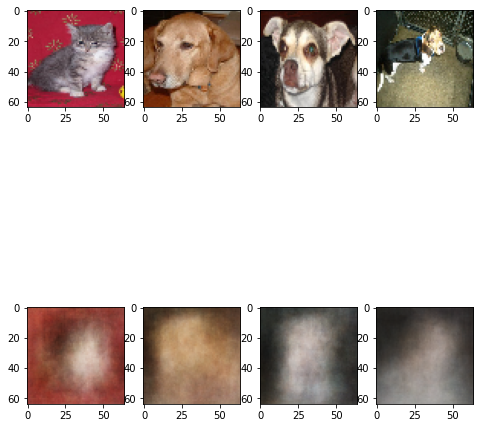

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.3, [1024, 256, 32], relu, 43epoch")
for i in range(4):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

In [ ]:
clear_output()

також спробуємо добавити/прибрати один скритий шар

In [ ]:
encoder, decoder, autoencoder = create_autoencoder([1024, 256], 'dropout', 0.3, 'relu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0492 - val_loss: 0.0325
Epoch 2/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0310 - val_loss: 0.0294
Epoch 3/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0288 - val_loss: 0.0287
Epoch 4/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0278 - val_loss: 0.0284
Epoch 5/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0279 - val_loss: 0.0286
Epoch 6/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0278 - val_loss: 0.0284
Epoch 7/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0275 - val_loss: 0.0283
Epoch 8/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0274 - val_loss: 0.0283
Epoch 9/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0275 - val_loss: 0.0284
Epoch 10/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0274 - val_l

1/1 [==============================] - 0s 21ms/step
dropout 0.3, [1024, 256], relu, 43epoch


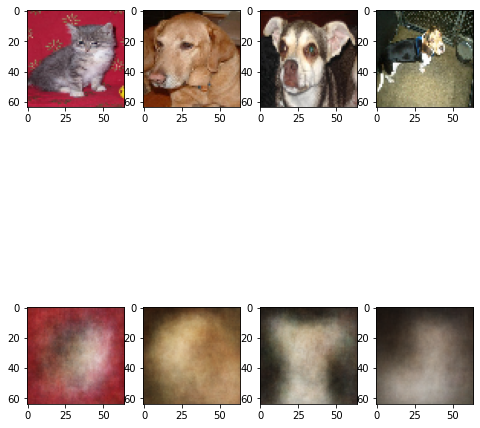

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.3, [1024, 256], relu, 50epoch")
for i in range(4):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([1024, 128], 'dropout', 0.3, 'relu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0538 - val_loss: 0.0380
Epoch 2/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0361 - val_loss: 0.0352
Epoch 3/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0338 - val_loss: 0.0343
Epoch 4/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0338 - val_loss: 0.0343
Epoch 5/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0335 - val_loss: 0.0343
Epoch 6/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0335 - val_loss: 0.0345
Epoch 7/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0335 - val_loss: 0.0341
Epoch 8/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0332 - val_loss: 0.0340
Epoch 9/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0334 - val_loss: 0.0342
Epoch 10/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0333 - val_l

1/1 [==============================] - 0s 75ms/step
dropout 0.3, [1024, 128], relu, 43epoch


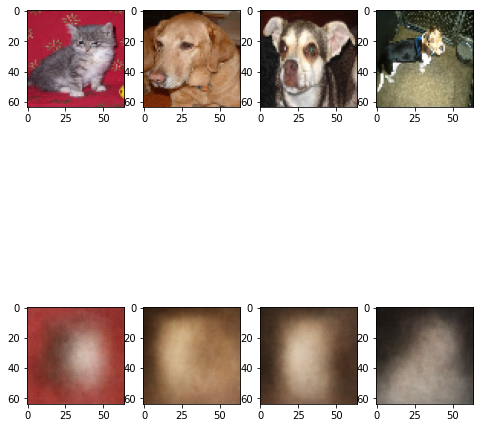

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.3, [1024, 128], relu, 50epoch")
for i in range(4):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([1024, 512, 128], 'dropout', 0.3, 'relu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0516 - val_loss: 0.0344
Epoch 2/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0318 - val_loss: 0.0309
Epoch 3/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0297 - val_loss: 0.0288
Epoch 4/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0278 - val_loss: 0.0282
Epoch 5/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0272 - val_loss: 0.0272
Epoch 6/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0266 - val_loss: 0.0267
Epoch 7/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0260 - val_loss: 0.0265
Epoch 8/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0257 - val_loss: 0.0265
Epoch 9/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0255 - val_loss: 0.0263
Epoch 10/50
621/621 [==============================] - 10s 16ms/step - loss: 0.025

1/1 [==============================] - 0s 84ms/step
dropout 0.3, [1024, 128], relu, 43epoch


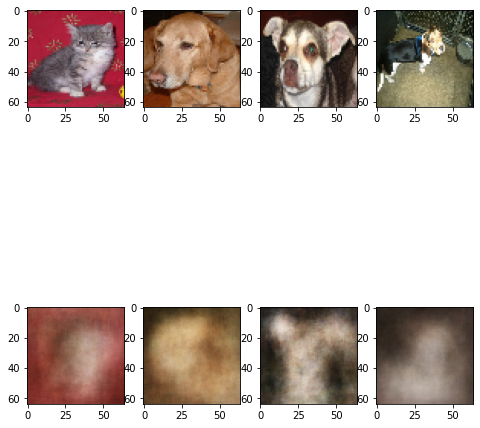

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.3, [1024, 512, 128], relu, 50epoch")
for i in range(4):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([1024, 512, 256], 'dropout', 0.3, 'relu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0527 - val_loss: 0.0353
Epoch 2/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0331 - val_loss: 0.0313
Epoch 3/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0306 - val_loss: 0.0291
Epoch 4/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0285 - val_loss: 0.0284
Epoch 5/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0276 - val_loss: 0.0277
Epoch 6/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0270 - val_loss: 0.0270
Epoch 7/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0262 - val_loss: 0.0263
Epoch 8/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0255 - val_loss: 0.0257
Epoch 9/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0253 - val_loss: 0.0256
Epoch 10/50
621/621 [==============================] - 10s 16ms/step - loss: 0.024

1/1 [==============================] - 0s 17ms/step
dropout 0.3, [1024, 512, 256], relu, 43epoch


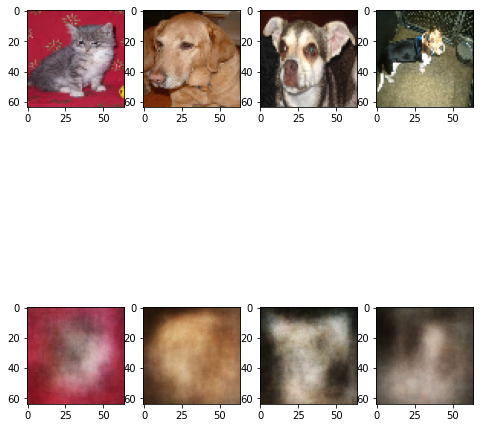

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.3, [1024, 512, 256], relu, 43epoch")
for i in range(4):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([2048, 512, 256], 'dropout', 0.3, 'relu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
621/621 [==============================] - 17s 26ms/step - loss: 0.0527 - val_loss: 0.0352
Epoch 2/50
621/621 [==============================] - 16s 26ms/step - loss: 0.0328 - val_loss: 0.0312
Epoch 3/50
621/621 [==============================] - 16s 26ms/step - loss: 0.0305 - val_loss: 0.0299
Epoch 4/50
621/621 [==============================] - 16s 26ms/step - loss: 0.0284 - val_loss: 0.0279
Epoch 5/50
621/621 [==============================] - 16s 26ms/step - loss: 0.0274 - val_loss: 0.0272
Epoch 6/50
621/621 [==============================] - 16s 26ms/step - loss: 0.0263 - val_loss: 0.0269
Epoch 7/50
621/621 [==============================] - 16s 26ms/step - loss: 0.0256 - val_loss: 0.0255
Epoch 8/50
621/621 [==============================] - 16s 26ms/step - loss: 0.0249 - val_loss: 0.0253
Epoch 9/50
621/621 [==============================] - 16s 26ms/step - loss: 0.0245 - val_loss: 0.0250
Epoch 10/50
621/621 [==============================] - 16s 26ms/step - loss: 0.024

1/1 [==============================] - 0s 19ms/step
dropout 0.3, [2048, 512, 256], relu, 43epoch


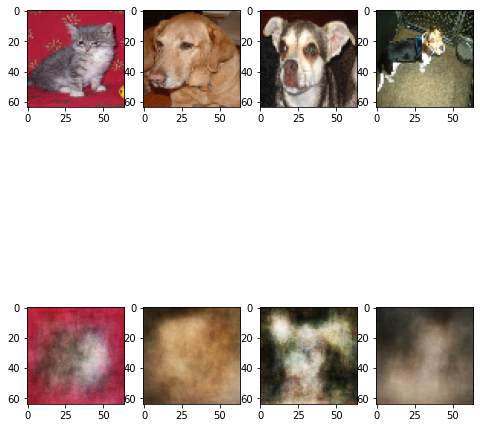

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.3, [2048, 512, 256], relu, 50epoch")
for i in range(4):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

змінемо тип та "силу" шуму

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([1024, 512, 256], 'dropout', 0.1, 'relu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0517 - val_loss: 0.0349
Epoch 2/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0323 - val_loss: 0.0311
Epoch 3/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0302 - val_loss: 0.0292
Epoch 4/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0282 - val_loss: 0.0279
Epoch 5/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0271 - val_loss: 0.0272
Epoch 6/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0265 - val_loss: 0.0264
Epoch 7/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0256 - val_loss: 0.0257
Epoch 8/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0249 - val_loss: 0.0254
Epoch 9/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0246 - val_loss: 0.0253
Epoch 10/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0242 - va

1/1 [==============================] - 0s 86ms/step
dropout 0.1, [2048, 512, 256], relu, 50epoch


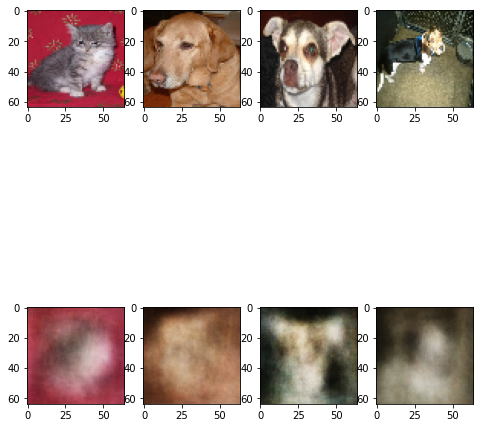

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.1, [1024, 512, 256], relu, 50epoch")
for i in range(4):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([1024, 512, 256], 'gaussian', 0.1, 'relu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0521 - val_loss: 0.0353
Epoch 2/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0331 - val_loss: 0.0314
Epoch 3/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0304 - val_loss: 0.0295
Epoch 4/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0286 - val_loss: 0.0284
Epoch 5/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0275 - val_loss: 0.0270
Epoch 6/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0260 - val_loss: 0.0262
Epoch 7/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0254 - val_loss: 0.0257
Epoch 8/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0249 - val_loss: 0.0252
Epoch 9/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0241 - val_loss: 0.0245
Epoch 10/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0237 

1/1 [==============================] - 0s 102ms/step
gaussian 0.1, [2048, 512, 256], relu, 50epoch


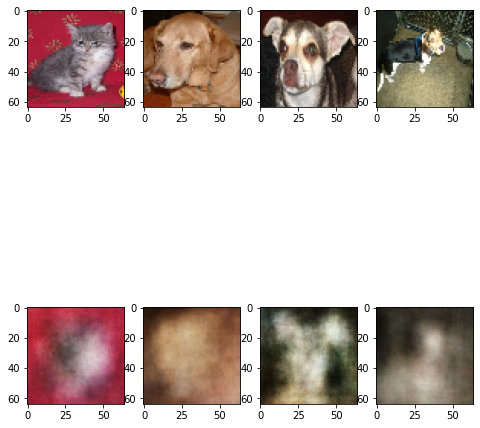

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("gaussian 0.1, [1024, 512, 256], relu, 50epoch")
for i in range(4):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([1024, 512, 256], 'gaussian', 0.3, 'relu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0515 - val_loss: 0.0341
Epoch 2/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0321 - val_loss: 0.0309
Epoch 3/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0300 - val_loss: 0.0292
Epoch 4/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0283 - val_loss: 0.0276
Epoch 5/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0271 - val_loss: 0.0300
Epoch 6/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0266 - val_loss: 0.0259
Epoch 7/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0253 - val_loss: 0.0254
Epoch 8/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0247 - val_loss: 0.0249
Epoch 9/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0241 - val_loss: 0.0246
Epoch 10/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0237 - v

1/1 [==============================] - 0s 82ms/step
gaussian 0.3, [1024, 512, 256], relu, 50epoch


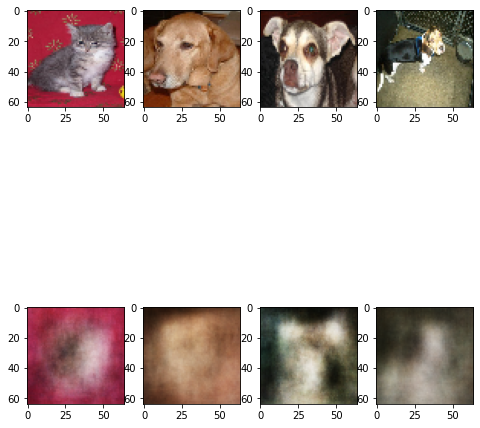

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("gaussian 0.3, [1024, 512, 256], relu, 50epoch")
for i in range(4):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([1024, 512, 256, 128], 'dropout', 0.3, 'relu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
621/621 [==============================] - 11s 16ms/step - loss: 0.0547 - val_loss: 0.0400
Epoch 2/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0388 - val_loss: 0.0364
Epoch 3/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0356 - val_loss: 0.0336
Epoch 4/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0323 - val_loss: 0.0312
Epoch 5/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0306 - val_loss: 0.0309
Epoch 6/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0302 - val_loss: 0.0301
Epoch 7/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0295 - val_loss: 0.0296
Epoch 8/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0287 - val_loss: 0.0289
Epoch 9/50
621/621 [==============================] - 10s 16ms/step - loss: 0.0280 - val_loss: 0.0282
Epoch 10/50
621/621 [==============================] - 10s 16ms/step - loss: 0.027

1/1 [==============================] - 0s 94ms/step
gaussian 0.3, [1024, 512, 256, 128], relu, 50epoch


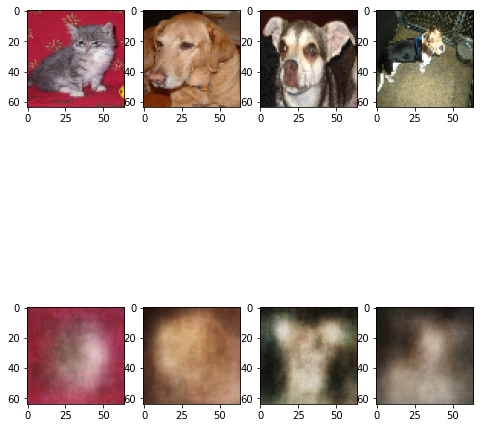

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.3, [1024, 512, 256, 128], relu, 50epoch")
for i in range(4):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

спробуємо змінити функцію активації

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([1024, 512, 256], 'dropout', 0.3, 'elu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0394 - val_loss: 0.0260
Epoch 2/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0252 - val_loss: 0.0234
Epoch 3/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0229 - val_loss: 0.0224
Epoch 4/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0220 - val_loss: 0.0216
Epoch 5/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0212 - val_loss: 0.0211
Epoch 6/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0207 - val_loss: 0.0207
Epoch 7/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0206 - val_loss: 0.0213
Epoch 8/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0202 - val_loss: 0.0201
Epoch 9/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0198 - val_loss: 0.0201
Epoch 10/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0196 - v

1/1 [==============================] - 0s 19ms/step
dropout 0.3, [1024, 512, 256, 128], elu, 50epoch


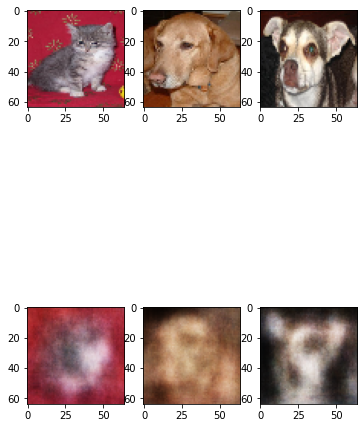

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.3, [1024, 512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

бачимо суттєве покращення 

In [ ]:
clear_output()
encoder, decoder, autoencoder = create_autoencoder([1024, 512, 256], 'dropout', 0.2, 'elu')
opt = Adam()
mse = MeanSquaredError()
autoencoder.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  history = autoencoder.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0399 - val_loss: 0.0261
Epoch 2/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0248 - val_loss: 0.0236
Epoch 3/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0228 - val_loss: 0.0231
Epoch 4/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0217 - val_loss: 0.0212
Epoch 5/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0210 - val_loss: 0.0219
Epoch 6/50
621/621 [==============================] - 9s 15ms/step - loss: 0.0206 - val_loss: 0.0207
Epoch 7/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0202 - val_loss: 0.0205
Epoch 8/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0199 - val_loss: 0.0201
Epoch 9/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0199 - val_loss: 0.0202
Epoch 10/50
621/621 [==============================] - 10s 15ms/step - loss: 0.0196 - v

 **Випадково обрати декiлька зображень iз тестової множини, надрукувати
їх разом з їх реконструкцiями.**

1/1 [==============================] - 0s 17ms/step
dropout 0.2, [1024, 512, 256], elu, 50epoch


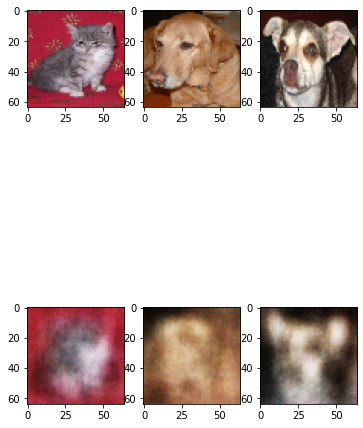

In [ ]:
pred = autoencoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.2, [1024, 512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

**Надрукувати знайденi низькорiвневi ознаки зображень.**

1/1 [==============================] - 0s 15ms/step
dropout 0.2, [1024, 512, 256], elu, 50epoch


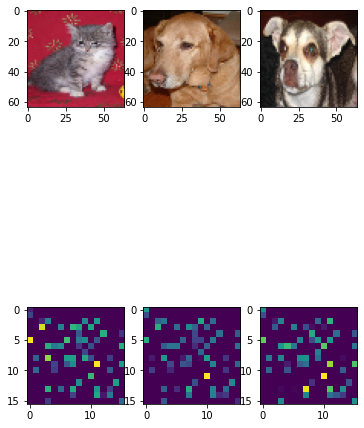

In [ ]:
pred = encoder.predict(np.array(test2), batch_size=21, verbose=1)
print("dropout 0.2, [1024, 512, 256], elu, 50epoch")
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4].reshape(16, 16))
plt.show()

In [ ]:
encoder.save('drive/MyDrive/encoder')
decoder.save('drive/MyDrive/decoder')

INFO:tensorflow:Assets written to: drive/MyDrive/encoder/assets
INFO:tensorflow:Assets written to: drive/MyDrive/decoder/assets


In [ ]:
encoder, decoder = load_model("drive/MyDrive/encoder"), load_model("drive/MyDrive/decoder")

In [ ]:
encoder.summary()
decoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 12288)             0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 12288)             0         
_________________________________________________________________
dense_106 (Dense)            (None, 1024)              12583936  
_________________________________________________________________
dense_107 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_108 (Dense)            (None, 256)               131328    
Total params: 13,240,064
Trainable params: 13,240,064
Non-trainable params: 0
_______________________________________________

**Використати найнижчi шари побудованої моделi шумопригнiчуючого автокодувальника:**

На їх основi побудувати глибоку нейронну мережу для класифiкацiї.


Навчити цю модель, використовуючи 10% навчального набору.

In [ ]:
encoder.trainable = False
X_10 = X[:2000]
y_10 = Y[:2000]

In [ ]:
stop = EarlyStopping(
    monitor="val_accuracy",
    patience=5,
    mode="max",
    restore_best_weights=True,
)

In [ ]:
opt = Adam()

model = Sequential()
model.add(encoder)
model.add(Dense(1, 'sigmoid'))

model.compile(optimizer=opt, loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Functional)         (None, 256)               13240064  
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 13,240,321
Trainable params: 257
Non-trainable params: 13,240,064
_________________________________________________________________


In [ ]:
history = model.fit(X_10, y_10, validation_data=(X_v, Y_v), epochs=100, verbose=1, callbacks = stop)

Epoch 1/100
63/63 [==============================] - 1s 14ms/step - loss: 1.0874 - accuracy: 0.4790 - val_loss: 0.9073 - val_accuracy: 0.4881
Epoch 2/100
63/63 [==============================] - 1s 11ms/step - loss: 0.8971 - accuracy: 0.5024 - val_loss: 0.8560 - val_accuracy: 0.4976
Epoch 3/100
63/63 [==============================] - 1s 11ms/step - loss: 0.8456 - accuracy: 0.5368 - val_loss: 0.8357 - val_accuracy: 0.5087
Epoch 4/100
63/63 [==============================] - 1s 11ms/step - loss: 0.8070 - accuracy: 0.5491 - val_loss: 0.7877 - val_accuracy: 0.5166
Epoch 5/100
63/63 [==============================] - 1s 11ms/step - loss: 0.7733 - accuracy: 0.5294 - val_loss: 0.7678 - val_accuracy: 0.5257
Epoch 6/100
63/63 [==============================] - 1s 11ms/step - loss: 0.7456 - accuracy: 0.5387 - val_loss: 0.7471 - val_accuracy: 0.5328
Epoch 7/100
63/63 [==============================] - 1s 11ms/step - loss: 0.7407 - accuracy: 0.5467 - val_loss: 0.7430 - val_accuracy: 0.5411
Epoch 

пробуємо добавити один скритий шар

In [ ]:
opt = Adam()

model2 = Sequential()
model2.add(encoder)
model2.add(Dense(128))
model2.add(Dense(1, 'sigmoid'))

model2.compile(optimizer=opt, loss = "binary_crossentropy", metrics = ["accuracy"])
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Functional)         (None, 256)               13240064  
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 129       
Total params: 13,273,089
Trainable params: 33,025
Non-trainable params: 13,240,064
_________________________________________________________________


In [ ]:
history2 = model2.fit(X_10, y_10, validation_data=(X_v, Y_v), epochs=100, verbose=1, callbacks = stop)

Epoch 1/100
63/63 [==============================] - 1s 14ms/step - loss: 1.8664 - accuracy: 0.4639 - val_loss: 0.8031 - val_accuracy: 0.5352
Epoch 2/100
63/63 [==============================] - 1s 11ms/step - loss: 0.7984 - accuracy: 0.5761 - val_loss: 0.8781 - val_accuracy: 0.5210
Epoch 3/100
63/63 [==============================] - 1s 11ms/step - loss: 0.7196 - accuracy: 0.5786 - val_loss: 0.8046 - val_accuracy: 0.5340
Epoch 4/100
63/63 [==============================] - 1s 11ms/step - loss: 0.7341 - accuracy: 0.5619 - val_loss: 0.7521 - val_accuracy: 0.5332
Epoch 5/100
63/63 [==============================] - 1s 11ms/step - loss: 0.7281 - accuracy: 0.5625 - val_loss: 0.6787 - val_accuracy: 0.5803
Epoch 6/100
63/63 [==============================] - 1s 11ms/step - loss: 0.6829 - accuracy: 0.5907 - val_loss: 0.7129 - val_accuracy: 0.5720
Epoch 7/100
63/63 [==============================] - 1s 12ms/step - loss: 0.6900 - accuracy: 0.5854 - val_loss: 0.7055 - val_accuracy: 0.5748
Epoch 

Чи може ця модель працювати так само добре як аналогiчна модель,
навчена на повному навчальному наборi?

In [ ]:
history = model.fit(X, Y, validation_data=(X_v, Y_v), epochs=100, verbose=1, callbacks = stop)

Epoch 1/100
621/621 [==============================] - 4s 6ms/step - loss: 0.6784 - accuracy: 0.5813 - val_loss: 0.6716 - val_accuracy: 0.5783
Epoch 2/100
621/621 [==============================] - 3s 5ms/step - loss: 0.6732 - accuracy: 0.5848 - val_loss: 0.6652 - val_accuracy: 0.5981
Epoch 3/100
621/621 [==============================] - 3s 5ms/step - loss: 0.6731 - accuracy: 0.5835 - val_loss: 0.6654 - val_accuracy: 0.5965
Epoch 4/100
621/621 [==============================] - 3s 5ms/step - loss: 0.6740 - accuracy: 0.5840 - val_loss: 0.6691 - val_accuracy: 0.5870
Epoch 5/100
621/621 [==============================] - 3s 5ms/step - loss: 0.6772 - accuracy: 0.5775 - val_loss: 0.6658 - val_accuracy: 0.5953
Epoch 6/100
621/621 [==============================] - 3s 5ms/step - loss: 0.6733 - accuracy: 0.5839 - val_loss: 0.6645 - val_accuracy: 0.5985
Epoch 7/100
621/621 [==============================] - 3s 5ms/step - loss: 0.6708 - accuracy: 0.5870 - val_loss: 0.6677 - val_accuracy: 0.5906

In [ ]:
history2 = model2.fit(X, Y, validation_data=(X_v, Y_v), epochs=100, verbose=1, callbacks = stop)

Epoch 1/100
621/621 [==============================] - 4s 6ms/step - loss: 0.7504 - accuracy: 0.5563 - val_loss: 0.6800 - val_accuracy: 0.5724
Epoch 2/100
621/621 [==============================] - 3s 6ms/step - loss: 0.7173 - accuracy: 0.5593 - val_loss: 0.6877 - val_accuracy: 0.5649
Epoch 3/100
621/621 [==============================] - 4s 6ms/step - loss: 0.7084 - accuracy: 0.5617 - val_loss: 0.7134 - val_accuracy: 0.5463
Epoch 4/100
621/621 [==============================] - 3s 6ms/step - loss: 0.6911 - accuracy: 0.5674 - val_loss: 0.7151 - val_accuracy: 0.5332
Epoch 5/100
621/621 [==============================] - 3s 6ms/step - loss: 0.6809 - accuracy: 0.5735 - val_loss: 0.6735 - val_accuracy: 0.5811
Epoch 6/100
621/621 [==============================] - 4s 6ms/step - loss: 0.6833 - accuracy: 0.5664 - val_loss: 0.6682 - val_accuracy: 0.5930
Epoch 7/100
621/621 [==============================] - 4s 6ms/step - loss: 0.6768 - accuracy: 0.5773 - val_loss: 0.6666 - val_accuracy: 0.5882

# Варiацiйний автокодувальник

Побудувати модель варiацiйного автокодувальника. Функцiю втрат визначити як суму втрати реконструкцiї та латентної втрати.

In [ ]:
original_dim = 64*64*3
latent_dim = 256

In [ ]:
#encoder

inputs = Input(shape=(original_dim,))
h = Dense(1024, activation='relu')(inputs)
#h = Dense(512, activation='elu')(h)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

In [ ]:
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = Lambda(sampling)([z_mean, z_log_sigma])

In [ ]:
#decoder

encoder =Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
#x = Dense(512, activation='elu')(latent_inputs)
x = Dense(1024, activation='relu')(latent_inputs)
outputs = Dense(64*64*3, activation='sigmoid')(x)
decoder = Model(latent_inputs, outputs, name='decoder')

outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

In [ ]:
vae.summary()

Model: "vae_mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 12288)]           0         
_________________________________________________________________
encoder (Functional)         [(None, 256), (None, 256) 13108736  
_________________________________________________________________
decoder (Functional)         (None, 12288)             12858368  
Total params: 25,967,104
Trainable params: 25,967,104
Non-trainable params: 0
_________________________________________________________________


нова лосс

In [ ]:
reconstruction_loss = mse(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer=Adam())

Навчити варiацiйний автокодувальник на цьому наборi. Спробувати
пiдiбрати значення гiперпараметрiв моделi.

In [ ]:
X_vae = X.reshape((len(X), np.prod(X.shape[1:])))
X_val_vae = X_v.reshape((len(X_v), np.prod(X_v.shape[1:])))
X_test_vae = X_t.reshape((len(X_t), np.prod(X_t.shape[1:])))

In [ ]:
stop = EarlyStopping(
    monitor="val_loss",
    patience=8,
    mode="min",
    restore_best_weights=True,
)

In [ ]:
vae.fit(X_vae, X_vae,epochs=300, batch_size=32, validation_data=(X_val_vae, X_val_vae), callbacks=stop)

Epoch 1/300
621/621 [==============================] - 9s 14ms/step - loss: 191.7126 - val_loss: 215.9794
Epoch 2/300
621/621 [==============================] - 8s 13ms/step - loss: 190.6679 - val_loss: 216.3369
Epoch 3/300
621/621 [==============================] - 8s 14ms/step - loss: 191.2752 - val_loss: 216.2549
Epoch 4/300
621/621 [==============================] - 8s 14ms/step - loss: 190.8824 - val_loss: 212.9149
Epoch 5/300
621/621 [==============================] - 8s 14ms/step - loss: 190.0248 - val_loss: 216.9585
Epoch 6/300
621/621 [==============================] - 8s 13ms/step - loss: 190.2892 - val_loss: 212.9697
Epoch 7/300
621/621 [==============================] - 9s 14ms/step - loss: 191.1599 - val_loss: 217.5069
Epoch 8/300
621/621 [==============================] - 9s 14ms/step - loss: 194.8452 - val_loss: 220.4388
Epoch 9/300
621/621 [==============================] - 8s 14ms/step - loss: 196.2994 - val_loss: 222.7580
Epoch 10/300
621/621 [========================

In [ ]:
test2_n = np.array(test2)

In [ ]:
test2_vae = test2_n.reshape((len(test2_n), np.prod(test2_n.shape[1:])))

1/1 [==============================] - 0s 14ms/step


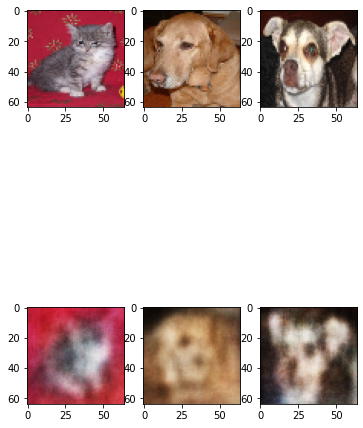

In [ ]:
j=4
pred = vae.predict(test2_vae, batch_size=21, verbose=1)
for i in range(3):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+j])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+j].reshape(64, 64,3))
plt.show()

In [ ]:
vae.save('drive/MyDrive/vae')

INFO:tensorflow:Assets written to: drive/MyDrive/vae/assets


In [ ]:
vae = load_model('drive/MyDrive/vae')

In [ ]:
enc = vae.layers[1].predict(test2_vae[6].reshape(1,-1), batch_size=21, verbose=1)[0]

1/1 [==============================] - 0s 18ms/step


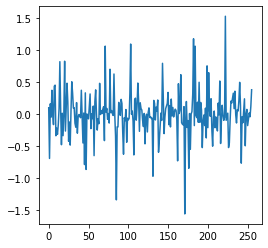

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(enc[0])
#plt.imshow(enc.reshape(16,16))
plt.show()

In [ ]:
enc.mean()

-0.0012590848

Сгенерувати новi зображення, схожi на тi, що є у навчальному наборi.

In [ ]:
rand_nums = -0.0012590848 + 0.21783997*np.random.randn(1, 256)

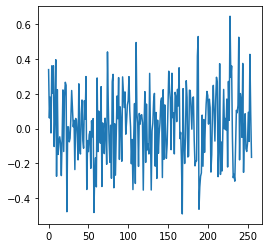

In [ ]:
plt.figure(figsize=(4,4))
plt.plot(rand_nums[0])
#plt.imshow(rand_nums.reshape(16,16))
plt.show()

In [ ]:
pred = vae.layers[2].predict(rand_nums, batch_size=21, verbose=1)

1/1 [==============================] - 0s 23ms/step


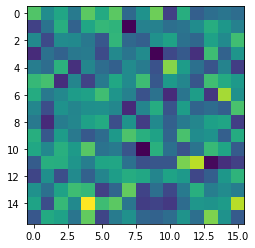

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(rand_nums.reshape(16,16))
plt.show()

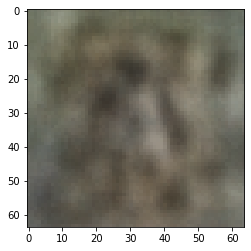

In [ ]:
plt.figure(figsize=(4,4))
plt.imshow(pred.reshape(64, 64,3))
plt.show()

# Виконати семантичне хешування зображень iз застосуванням модифiкованого глибокого автокодувальника

**Without noise**

20-bytes hash

In [ ]:
h20_enc, h20_dec, hasher20 = create_autoencoder([512, 256, 20], noise_type=None, noise_param=0,  activation='sigmoid')
opt = Adam()
mse = MeanSquaredError()
hasher20.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  hasher20.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
621/621 [==============================] - 9s 10ms/step - loss: 0.0651 - val_loss: 0.0602
Epoch 2/50
621/621 [==============================] - 6s 10ms/step - loss: 0.0587 - val_loss: 0.0593
Epoch 3/50
621/621 [==============================] - 6s 10ms/step - loss: 0.0581 - val_loss: 0.0592
Epoch 4/50
621/621 [==============================] - 6s 10ms/step - loss: 0.0578 - val_loss: 0.0591
Epoch 5/50
621/621 [==============================] - 6s 10ms/step - loss: 0.0577 - val_loss: 0.0593
Epoch 6/50
621/621 [==============================] - 6s 10ms/step - loss: 0.0574 - val_loss: 0.0590
Epoch 7/50
621/621 [==============================] - 6s 10ms/step - loss: 0.0573 - val_loss: 0.0587
Epoch 8/50
621/621 [==============================] - 6s 10ms/step - loss: 0.0567 - val_loss: 0.0551
Epoch 9/50
621/621 [==============================] - 6s 10ms/step - loss: 0.0536 - val_loss: 0.0546
Epoch 10/50
621/621 [==============================] - 6s 10ms/step - loss: 0.0533 - val_lo

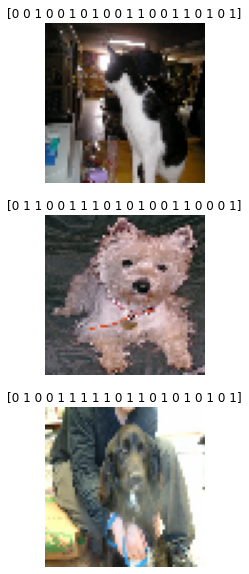

In [ ]:
X_hashed20 = (h20_enc.predict(X) > 0.5).astype('int')
for i in range(3):
    plt.subplot(3,1,1+i)
    plt.imshow(X[i])
    plt.title(X_hashed20[i])
    plt.axis('off')
plt.show()

30-bytes hash

In [ ]:
h30_enc, h30_dec, hasher30 = create_autoencoder([512, 256, 30], noise_type=None, noise_param=0,  activation='sigmoid')
opt = Adam()
mse = MeanSquaredError()
hasher30.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  hasher30.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=50, verbose=1)

Epoch 1/50
621/621 [==============================] - 7s 10ms/step - loss: 0.0647 - val_loss: 0.0605
Epoch 2/50
621/621 [==============================] - 6s 10ms/step - loss: 0.0587 - val_loss: 0.0593
Epoch 3/50
621/621 [==============================] - 6s 10ms/step - loss: 0.0586 - val_loss: 0.0592
Epoch 4/50
621/621 [==============================] - 6s 10ms/step - loss: 0.0581 - val_loss: 0.0591
Epoch 5/50
621/621 [==============================] - 6s 10ms/step - loss: 0.0580 - val_loss: 0.0592
Epoch 6/50
621/621 [==============================] - 6s 10ms/step - loss: 0.0576 - val_loss: 0.0590
Epoch 7/50
621/621 [==============================] - 6s 10ms/step - loss: 0.0573 - val_loss: 0.0552
Epoch 8/50
621/621 [==============================] - 6s 10ms/step - loss: 0.0536 - val_loss: 0.0545
Epoch 9/50
621/621 [==============================] - 6s 10ms/step - loss: 0.0534 - val_loss: 0.0546
Epoch 10/50
621/621 [==============================] - 6s 10ms/step - loss: 0.0532 - val_lo

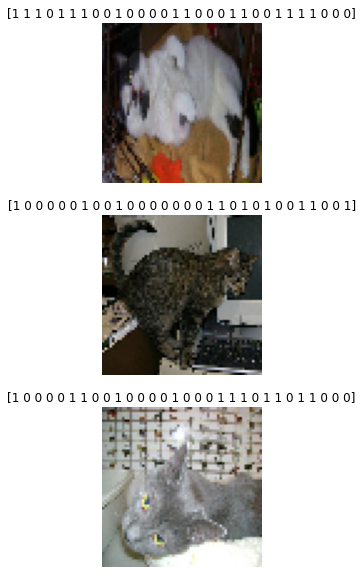

In [ ]:
X_hashed30 = (h30_enc.predict(X) > 0.5).astype('int')
for i in range(3):
    plt.subplot(3,1,1+i)
    plt.imshow(X[i+3])
    plt.title(X_hashed30[i+3])
    plt.axis('off')
plt.show()

40-bytes hash

In [ ]:
h40_enc, h40_dec, hasher40 = create_autoencoder([512, 256, 40], noise_type=None, noise_param=0,  activation='sigmoid')
opt = Adam()
mse = MeanSquaredError()
hasher40.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  hasher40.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=80, verbose=1)

Epoch 1/65
621/621 [==============================] - 7s 10ms/step - loss: 0.0644 - val_loss: 0.0603
Epoch 2/65
621/621 [==============================] - 6s 9ms/step - loss: 0.0589 - val_loss: 0.0594
Epoch 3/65
621/621 [==============================] - 6s 10ms/step - loss: 0.0576 - val_loss: 0.0592
Epoch 4/65
621/621 [==============================] - 6s 10ms/step - loss: 0.0578 - val_loss: 0.0591
Epoch 5/65
621/621 [==============================] - 6s 10ms/step - loss: 0.0578 - val_loss: 0.0593
Epoch 6/65
621/621 [==============================] - 6s 9ms/step - loss: 0.0577 - val_loss: 0.0589
Epoch 7/65
621/621 [==============================] - 6s 10ms/step - loss: 0.0570 - val_loss: 0.0555
Epoch 8/65
621/621 [==============================] - 6s 10ms/step - loss: 0.0537 - val_loss: 0.0549
Epoch 9/65
621/621 [==============================] - 6s 10ms/step - loss: 0.0533 - val_loss: 0.0547
Epoch 10/65
621/621 [==============================] - 6s 10ms/step - loss: 0.0530 - val_loss

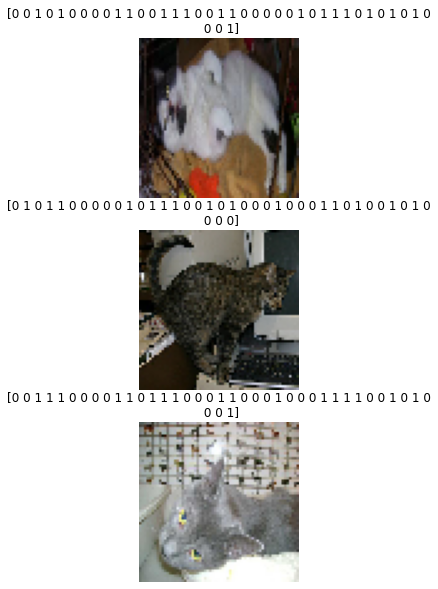

In [ ]:
X_hashed40 = (h40_enc.predict(X) > 0.5).astype('int')
for i in range(3):
    plt.subplot(3,1,1+i)
    plt.imshow(X[i+3])
    plt.title(X_hashed40[i+3])
    plt.axis('off')
plt.show()

64-bytes hash

In [ ]:
h64_enc, h64_dec, hasher64 = create_autoencoder([512, 256, 64], noise_type=None, noise_param=0,  activation='sigmoid')
opt = Adam()
mse = MeanSquaredError()
hasher64.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  hasher64.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=80, verbose=1)

Epoch 1/80
621/621 [==============================] - 6s 10ms/step - loss: 0.0639 - val_loss: 0.0602
Epoch 2/80
621/621 [==============================] - 6s 9ms/step - loss: 0.0579 - val_loss: 0.0603
Epoch 3/80
621/621 [==============================] - 6s 9ms/step - loss: 0.0579 - val_loss: 0.0591
Epoch 4/80
621/621 [==============================] - 6s 9ms/step - loss: 0.0580 - val_loss: 0.0591
Epoch 5/80
621/621 [==============================] - 6s 9ms/step - loss: 0.0575 - val_loss: 0.0565
Epoch 6/80
621/621 [==============================] - 6s 10ms/step - loss: 0.0545 - val_loss: 0.0546
Epoch 7/80
621/621 [==============================] - 6s 9ms/step - loss: 0.0532 - val_loss: 0.0542
Epoch 8/80
621/621 [==============================] - 6s 9ms/step - loss: 0.0529 - val_loss: 0.0541
Epoch 9/80
621/621 [==============================] - 6s 9ms/step - loss: 0.0528 - val_loss: 0.0541
Epoch 10/80
621/621 [==============================] - 6s 9ms/step - loss: 0.0526 - val_loss: 0.05

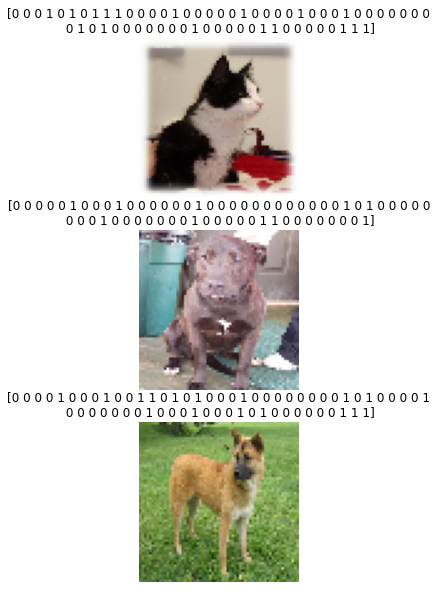

In [ ]:
X_hashed64 = (h64_enc.predict(X) > 0.5).astype('int')
for i in range(3):
    plt.subplot(3,1,1+i)
    plt.imshow(X[i+6])
    plt.title(X_hashed64[i+6])
    plt.axis('off')
plt.show()

With noise

20-bytes hash

In [ ]:
h20_enc_n, h20_dec_n, hasher20_n = create_autoencoder([512, 256, 20], noise_type='gaussian', noise_param=0.2,  activation='sigmoid')
opt = Adam()
mse = MeanSquaredError()
hasher20_n.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  hasher20_n.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=80, verbose=1)

Epoch 1/80
621/621 [==============================] - 7s 10ms/step - loss: 0.0650 - val_loss: 0.0609
Epoch 2/80
621/621 [==============================] - 6s 9ms/step - loss: 0.0585 - val_loss: 0.0593
Epoch 3/80
621/621 [==============================] - 6s 10ms/step - loss: 0.0582 - val_loss: 0.0591
Epoch 4/80
621/621 [==============================] - 6s 10ms/step - loss: 0.0579 - val_loss: 0.0592
Epoch 5/80
621/621 [==============================] - 6s 10ms/step - loss: 0.0581 - val_loss: 0.0590
Epoch 6/80
621/621 [==============================] - 6s 10ms/step - loss: 0.0575 - val_loss: 0.0589
Epoch 7/80
621/621 [==============================] - 6s 10ms/step - loss: 0.0574 - val_loss: 0.0586
Epoch 8/80
621/621 [==============================] - 6s 10ms/step - loss: 0.0561 - val_loss: 0.0549
Epoch 9/80
621/621 [==============================] - 6s 9ms/step - loss: 0.0536 - val_loss: 0.0544
Epoch 10/80
621/621 [==============================] - 6s 10ms/step - loss: 0.0529 - val_loss

30-bytes hash

In [ ]:
h30_enc_n, h30_dec_n, hasher30_n = create_autoencoder([512, 256, 30], noise_type='gaussian', noise_param=0.2,  activation='sigmoid')
opt = Adam()
mse = MeanSquaredError()
hasher30_n.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  hasher30_n.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=100, verbose=1)

Epoch 1/100
621/621 [==============================] - 7s 10ms/step - loss: 0.0639 - val_loss: 0.0604
Epoch 2/100
621/621 [==============================] - 6s 9ms/step - loss: 0.0581 - val_loss: 0.0593
Epoch 3/100
621/621 [==============================] - 6s 10ms/step - loss: 0.0581 - val_loss: 0.0591
Epoch 4/100
621/621 [==============================] - 6s 9ms/step - loss: 0.0576 - val_loss: 0.0590
Epoch 5/100
621/621 [==============================] - 6s 10ms/step - loss: 0.0577 - val_loss: 0.0573
Epoch 6/100
621/621 [==============================] - 6s 10ms/step - loss: 0.0548 - val_loss: 0.0544
Epoch 7/100
621/621 [==============================] - 6s 9ms/step - loss: 0.0534 - val_loss: 0.0546
Epoch 8/100
621/621 [==============================] - 6s 10ms/step - loss: 0.0532 - val_loss: 0.0542
Epoch 9/100
621/621 [==============================] - 6s 10ms/step - loss: 0.0528 - val_loss: 0.0543
Epoch 10/100
621/621 [==============================] - 6s 10ms/step - loss: 0.0526 -

40-bytes hash

In [ ]:
h40_enc_n, h40_dec_n, hasher40_n = create_autoencoder([512, 256, 40], noise_type='gaussian', noise_param=0.2,  activation='sigmoid')
opt = Adam()
mse = MeanSquaredError()
hasher40_n.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  hasher40_n.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=120, verbose=1)

Epoch 1/120
621/621 [==============================] - 7s 10ms/step - loss: 0.0644 - val_loss: 0.0613
Epoch 2/120
621/621 [==============================] - 6s 10ms/step - loss: 0.0584 - val_loss: 0.0593
Epoch 3/120
621/621 [==============================] - 6s 10ms/step - loss: 0.0581 - val_loss: 0.0592
Epoch 4/120
621/621 [==============================] - 6s 10ms/step - loss: 0.0581 - val_loss: 0.0590
Epoch 5/120
621/621 [==============================] - 6s 10ms/step - loss: 0.0574 - val_loss: 0.0592
Epoch 6/120
621/621 [==============================] - 6s 10ms/step - loss: 0.0575 - val_loss: 0.0587
Epoch 7/120
621/621 [==============================] - 6s 10ms/step - loss: 0.0570 - val_loss: 0.0554
Epoch 8/120
621/621 [==============================] - 6s 10ms/step - loss: 0.0535 - val_loss: 0.0543
Epoch 9/120
621/621 [==============================] - 6s 10ms/step - loss: 0.0533 - val_loss: 0.0541
Epoch 10/120
621/621 [==============================] - 6s 10ms/step - loss: 0.052

In [ ]:
hasher20.save('drive/MyDrive/hasher20')
hasher30.save('drive/MyDrive/hasher30')
hasher40.save('drive/MyDrive/hasher40')
hasher64.save('drive/MyDrive/hasher64')
hasher20_n.save('drive/MyDrive/hasher20_n')
hasher30_n.save('drive/MyDrive/hasher30_n')
hasher40_n.save('drive/MyDrive/hasher40_n')

INFO:tensorflow:Assets written to: drive/MyDrive/hasher20/assets
INFO:tensorflow:Assets written to: drive/MyDrive/hasher30/assets
INFO:tensorflow:Assets written to: drive/MyDrive/hasher40/assets
INFO:tensorflow:Assets written to: drive/MyDrive/hasher64/assets
INFO:tensorflow:Assets written to: drive/MyDrive/hasher20_n/assets
INFO:tensorflow:Assets written to: drive/MyDrive/hasher30_n/assets
INFO:tensorflow:Assets written to: drive/MyDrive/hasher40_n/assets


In [ ]:
h64_enc_n, h64_dec_n, hasher64_n = create_autoencoder([512, 256, 64], noise_type='gaussian', noise_param=0.2,  activation='sigmoid')
opt = Adam()
mse = MeanSquaredError()
hasher64_n.compile(optimizer=opt, loss = mse)
with tf.device('/device:GPU:0'):
  hasher64_n.fit(x=X, y=X, validation_data=(X_v, X_v), epochs=140, verbose=1)

Epoch 1/140
621/621 [==============================] - 7s 10ms/step - loss: 0.0640 - val_loss: 0.0598
Epoch 2/140
621/621 [==============================] - 6s 10ms/step - loss: 0.0582 - val_loss: 0.0598
Epoch 3/140
621/621 [==============================] - 6s 10ms/step - loss: 0.0582 - val_loss: 0.0590
Epoch 4/140
621/621 [==============================] - 6s 10ms/step - loss: 0.0577 - val_loss: 0.0590
Epoch 5/140
621/621 [==============================] - 6s 10ms/step - loss: 0.0573 - val_loss: 0.0588
Epoch 6/140
621/621 [==============================] - 6s 10ms/step - loss: 0.0574 - val_loss: 0.0558
Epoch 7/140
621/621 [==============================] - 6s 10ms/step - loss: 0.0538 - val_loss: 0.0544
Epoch 8/140
621/621 [==============================] - 6s 10ms/step - loss: 0.0530 - val_loss: 0.0543
Epoch 9/140
621/621 [==============================] - 6s 10ms/step - loss: 0.0528 - val_loss: 0.0543
Epoch 10/140
621/621 [==============================] - 6s 10ms/step - loss: 0.052

In [ ]:
hasher64_n.save('drive/MyDrive/hasher64_n')

INFO:tensorflow:Assets written to: drive/MyDrive/hasher64_n/assets


In [ ]:
X_hashed20_n = (h20_enc_n.predict(X) > 0.5).astype('int')
X_hashed20_n.shape

(19872, 20)

In [ ]:
X_hashed64_n = (h64_enc_n.predict(X) > 0.5).astype('int')
X_hashed64_n.shape

(19872, 64)

Вiдобразити зображення, якi мають однаковi хешi. Вiзуально оцiнити
чи виглядають однаковими зображення, що мають однаковi хешi.

In [ ]:
repeat = {}
for j, h in enumerate(X_hashed64_n):
  if str(h) in repeat.keys():
    repeat[str(h)].append(j)
  else:
    repeat[str(h)] = list([j])

In [ ]:
repeat

{'[0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0\n 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0]': [0],
 '[0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0\n 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0]': [1],
 '[0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0\n 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0]': [2],
 '[0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0\n 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0]': [3],
 '[0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0\n 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0]': [4],
 '[0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0\n 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]': [5],
 '[1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0\n 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0]': [6],
 '[0 0 0 1 0 

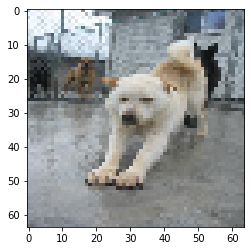

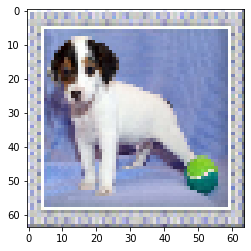

In [ ]:
plt.figure(figsize = (4, 4))
plt.imshow(X[955])
plt.show();

plt.figure(figsize = (4, 4))
plt.imshow(X[1134])
plt.show();

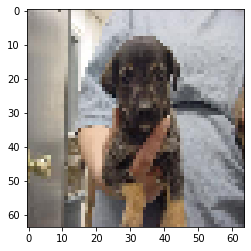

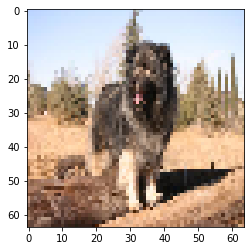

In [ ]:
plt.figure(figsize = (4, 4))
plt.imshow(X[961])
plt.show();

plt.figure(figsize = (4, 4))
plt.imshow(X[17221])
plt.show();

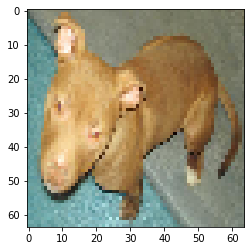

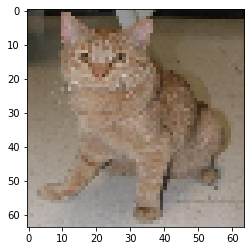

In [ ]:
plt.figure(figsize = (4, 4))
plt.imshow(X[899])
plt.show();

plt.figure(figsize = (4, 4))
plt.imshow(X[10971])
plt.show();

In [ ]:
hasher64_n = load_model('drive/MyDrive/hasher64_n')

Розрахувати середнє значення iндексiв забрудненостi Джинi.

In [32]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [ ]:
X.shape

(19872, 64, 64, 3)

In [ ]:
X_64 = hasher64_n.predict(X)
X_64.shape

(19872, 64, 64, 3)

In [ ]:
x_flatten = X[:1000].flatten()
X_64_flatten = X_64[:1000].flatten()

In [ ]:
gini_predictions = gini(x_flatten, X_64_flatten)
gini_max = gini(x_flatten, x_flatten)
ngini= gini_normalized(x_flatten, X_64_flatten)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.107, Max. Gini: 0.161, Normalized Gini: 0.665


Розглянути третю модель - глибоку згорткову мережу

In [18]:
input_enc = Input((64, 64, 3))

x = Conv2D(64, (3, 3), activation='elu', padding='same')(input_enc)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='elu', padding='same')(x)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(4, (3, 3), activation='elu', padding='same')(x)
encoded2 = MaxPool2D((2, 2), padding='same')(x)

input_dec = Input(encoded2.shape[1:])
x = Conv2D(4, (3, 3), activation='elu', padding='same')(input_dec)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='elu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='elu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded2 = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

encoder2 = Model(input_enc, encoded2, name="encoder2")
encoder2.summary()
decoder2 = Model(input_dec, decoded2, name="decoder2")
decoder2.summary()
autoencoder2 = Model(input_enc, decoder2(encoder2(input_enc)), name="autoencoder2")

Model: "encoder2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 4)         1156      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 4)           0  

In [19]:
opt = Adam()
los = MeanSquaredError()
autoencoder2.compile(optimizer=opt, loss = los)
with tf.device('/device:GPU:0'):
  autoencoder2.fit(X, X, validation_data=(X_v, X_v), verbose=1, epochs=100)

Epoch 1/100
621/621 [==============================] - 21s 32ms/step - loss: 0.0264 - val_loss: 0.0163
Epoch 2/100
621/621 [==============================] - 20s 32ms/step - loss: 0.0156 - val_loss: 0.0149
Epoch 3/100
621/621 [==============================] - 20s 32ms/step - loss: 0.0145 - val_loss: 0.0141
Epoch 4/100
621/621 [==============================] - 20s 32ms/step - loss: 0.0139 - val_loss: 0.0136
Epoch 5/100
621/621 [==============================] - 20s 32ms/step - loss: 0.0133 - val_loss: 0.0133
Epoch 6/100
621/621 [==============================] - 20s 32ms/step - loss: 0.0132 - val_loss: 0.0131
Epoch 7/100
621/621 [==============================] - 20s 32ms/step - loss: 0.0129 - val_loss: 0.0128
Epoch 8/100
621/621 [==============================] - 20s 32ms/step - loss: 0.0126 - val_loss: 0.0126
Epoch 9/100
621/621 [==============================] - 20s 32ms/step - loss: 0.0125 - val_loss: 0.0124
Epoch 10/100
621/621 [==============================] - 20s 32ms/step - l

1/1 [==============================] - 0s 283ms/step


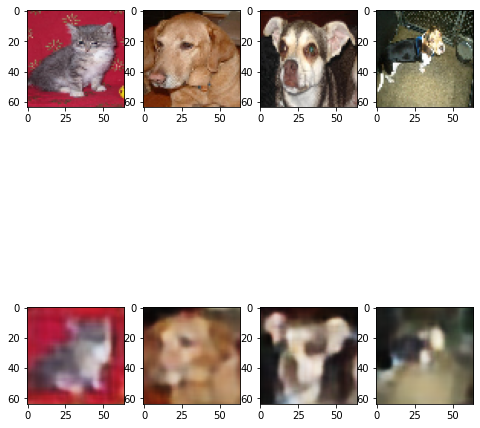

In [20]:
pred = autoencoder2.predict(np.array(test2), batch_size=21, verbose=1)
for i in range(4):
    plt.subplot(2,4,1+i)
    plt.imshow(test2[i+4])
    plt.subplot(2,4,i+5)
    plt.imshow(pred[i+4])
plt.show()

In [26]:
hash = (encoder.predict(X) > 0.5).astype('int').reshape(19872, -1)
hash.shape

(19872, 256)

[1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1]


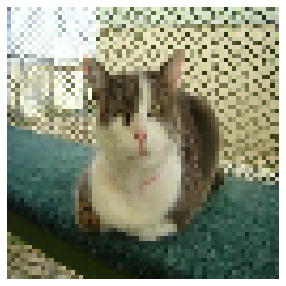

In [31]:
print(hash[0])
plt.figure(figsize = (5,5))
plt.imshow(X[0])
plt.axis('off')
plt.show()

In [39]:
x_256 = autoencoder2.predict(X)

In [40]:
x_f = X[:1000].flatten()
X_256_f = x_256[:1000].flatten()

In [41]:
X_256_f.shape, x_f.shape

((12288000,), (12288000,))

In [42]:
gini_predictions = gini(x_f, X_256_f)
gini_max = gini(x_f, x_f)
ngini= gini_normalized(x_f, X_256_f)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.152, Max. Gini: 0.165, Normalized Gini: 0.920


In [43]:
autoencoder2.save('drive/MyDrive/auto_cnn')

INFO:tensorflow:Assets written to: drive/MyDrive/auto_cnn/assets


In [44]:
repeat = {}
for j, h in enumerate(hash):
  if str(h) in repeat.keys():
    repeat[str(h)].append(j)
  else:
    repeat[str(h)] = list([j])

In [46]:
repeat

{'[1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1\n 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1\n 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0\n 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1]': [0],
 '[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1\n 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0\n 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1\n 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1\n 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0\n 1 1 1 

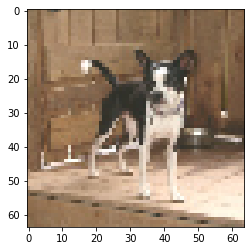

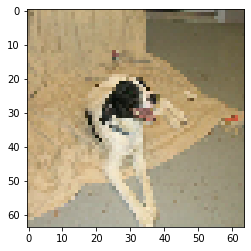

In [48]:
plt.figure(figsize = (4, 4))
plt.imshow(X[836])
plt.show();

plt.figure(figsize = (4, 4))
plt.imshow(X[13974])
plt.show();